# Library

In [2]:
import pandas as pd
import numpy as np
from bertopic import BERTopic

c:\Users\dommy\miniconda3\envs\gestione\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 3 Baseline Summary Content

## Clustering Approach

- **Parameter Setting**:
  - Embedding Model: all-MiniLM-L6-v2
  - Representation Model: keyBERTInspired, MaximalMarginalRelevance
  - Count Vectorizer
  - CtfIDF
  - UMAP: 20 neighbors, 8 components
  - HDBSCAN: 190 min cluster size
  - Zero-Shot Classification on cluster name
  - Outliers-reduction with Probabilites: 0.03 threshold

## Clustering Results

- **Clusters Retrieved**: 121 in which the most important ones concern:
  1. Drug sales (marijuana, cocaine, xanax, pills, meth, fentanyl,
  2. Bitcoin
  3. Scammers and seller reviews
  4. Marketplace advertising
  5. Purchase reviews
  6. Drug purchases
  7. Orders
  8. Closed sites (empire market, 
  9. Scams
  10. Sold passwords
  11. Hacker attacks
  12. Opsec questions
  13. Document and credit card forgery
  14. Chat links


- **Performance Metrics**:
  - **Silhouette Score**: 0.60
  - **Davies-Bouldin Score**: 0.46
  - **Coherence-Score**: 0.69
  - **Dos Score**: 0.24
  - **%Outliers**: 0.35 (91k/260k)

# Code

In order to avoid importing the whole **BERTopicUtils.py** module, and thus the linked libraries, I have only brought back the function needed to make predictions, it is the same as in the module

In [48]:
def predict_topic(topic_model: BERTopic, sentence: list, num_classes: int = 5, custom_labels: bool = False) -> pd.DataFrame:
    """
    Predict the topic of a sentence using the BERTopic model.
    :param topic_model: The BERTopic model.
    :param sentence: The sentence to predict the topic of.
    :param num_classes: The number of classes to return.
    :param custom_labels: Whether to use custom labels.
    :return: A DataFrame with the predicted topics.
    """
    # Transform the sentence
    _, pr = topic_model.transform(sentence)

    # Get the top indices
    top_indices = np.argsort(pr[0])[::-1][:num_classes]

    # Get the top topics
    if custom_labels:
        top_topics = [(topic_model.get_topic(i), pr[0][i], topic_model.custom_labels_[i+1]) for i in top_indices]
    else:
        top_topics = [(topic_model.get_topic(i), pr[0][i], topic_model.generate_topic_labels()[i+1]) for i in top_indices]
    
    # Create a DataFrame with the results
    df_finals = pd.DataFrame(top_topics, columns=['Topic', 'Probability', 'Label'])

    # Extract the words and sentence
    df_finals['Words'] = df_finals['Topic'].apply(lambda topic: [word for word, _ in topic])

    df_finals['Sentence'] = sentence * len(df_finals)
    
    return df_finals

# Visualize CSV Files

In [66]:
descr_topic = pd.read_csv('CSV121Topic/description_topic.csv')
document_topic = pd.read_parquet('CSV121Topic/document_topic_proba.parquet')
topics_over_time = pd.read_csv('CSV121Topic/topic_over_time_5.csv')

In [67]:
print(descr_topic.shape[0])
descr_topic.head()

121


,Topic,Count,BERTopic_Name,Representation,Representative_Docs,Custom_Name_GenAI,Custom_Name_Zero_Shot
0,0,14083,0_cart_weed_strain_thc,['cart' 'weed' 'strain' 'thc' 'bud' 'price' 'p...,['general review template general information ...,Product Reviews and Purchases,weed - thc - cart
1,2,5696,2_key_pgp_account_pgp key,['key' 'pgp' 'account' 'pgp key' 'password' 'm...,['ordered item dream attempt send address vend...,PGP Key Security,pgp key
2,1,5365,1_deposit_address_ticket_btc,['deposit' 'address' 'ticket' 'btc' 'wallet' '...,['missing two deposit week ago big deposit err...,Empire Deposit & Withdrawal Issues,ticket - deposit - address
3,5,4584,5_thanks_thank_lol_man,['thanks' 'thank' 'lol' 'man' 'bro' 'good' 'ni...,['love man thanks work brother' 'damn thats fu...,Friendly Positive Talk,thanks
4,25,3778,25_mg_pill_tablet_price,['mg' 'pill' 'tablet' 'price' 'xtc' 'pharma' '...,['hey empire customer back short vacation gene...,Drug Sales,xtc - mg - pill


In [68]:
print(document_topic.shape[0])
document_topic.head(5)

169288


,Document,Topic,Probability,Created_on,BERTopic_Name
0,finally got dream lilxan account confirmed pgp...,9,"[0.0019145853509105579, 0.0034859457117316834,...",2019-10-16,9_pgp_begin pgp_begin_pgp signature
1,im issues vendor account issues withdrawing cm...,1,"[0.004161525996584431, 0.09864712150395494, 0....",2019-10-30,1_deposit_address_ticket_btc
2,making switch xmr besides xmr hodler favorite ...,15,"[0.002285542372071366, 0.007466206317565759, 0...",2019-10-16,15_monero_xmr_wallet_btc
3,got free cooky cart order cannacreations one e...,0,"[0.2930367581669767, 0.0036731910177007464, 0....",2019-10-16,0_cart_weed_strain_thc
4,bg gone either oc look like he even cheaper oc...,38,"[0.005669327905041996, 0.0035937638895178897, ...",2019-10-16,38_pack_week_day_ordered


In [69]:
print(topics_over_time.shape[0])
topics_over_time.head(5)

605


,Topic,Words,Frequency,Timestamp,Custom_Name_GenAI
0,0,"product, strain, weed, price, vendor",1164,2018-02-14 07:22:04.800,Product Reviews and Purchases
1,0,"link, vendor, cart, product, price",1364,2018-07-03 14:24:00.000,Product Reviews and Purchases
2,0,"vendor, cart, product, weed, link",1508,2018-11-19 04:48:00.000,Product Reviews and Purchases
3,0,"link, cart, vendor, weed, product",7190,2019-04-06 19:12:00.000,Product Reviews and Purchases
4,0,"link, product, cart, vendor, price",2857,2019-08-23 09:36:00.000,Product Reviews and Purchases


# Visualize Graphs

In [43]:
topic_model = BERTopic.load("../../Analyze_files/CombiningAnalysisCompleteDataset/ContentAnalysis/ModelsContent/topic_model_all-MiniLM-L6-v2_190_20n_8dim")

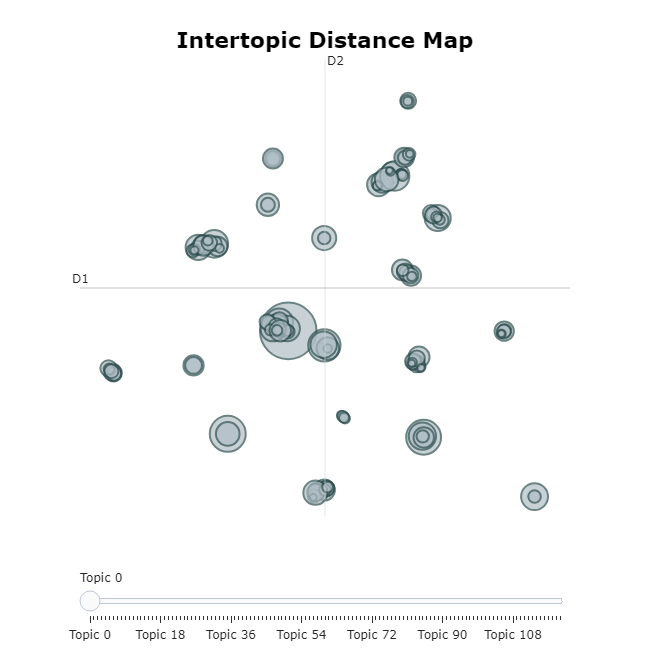

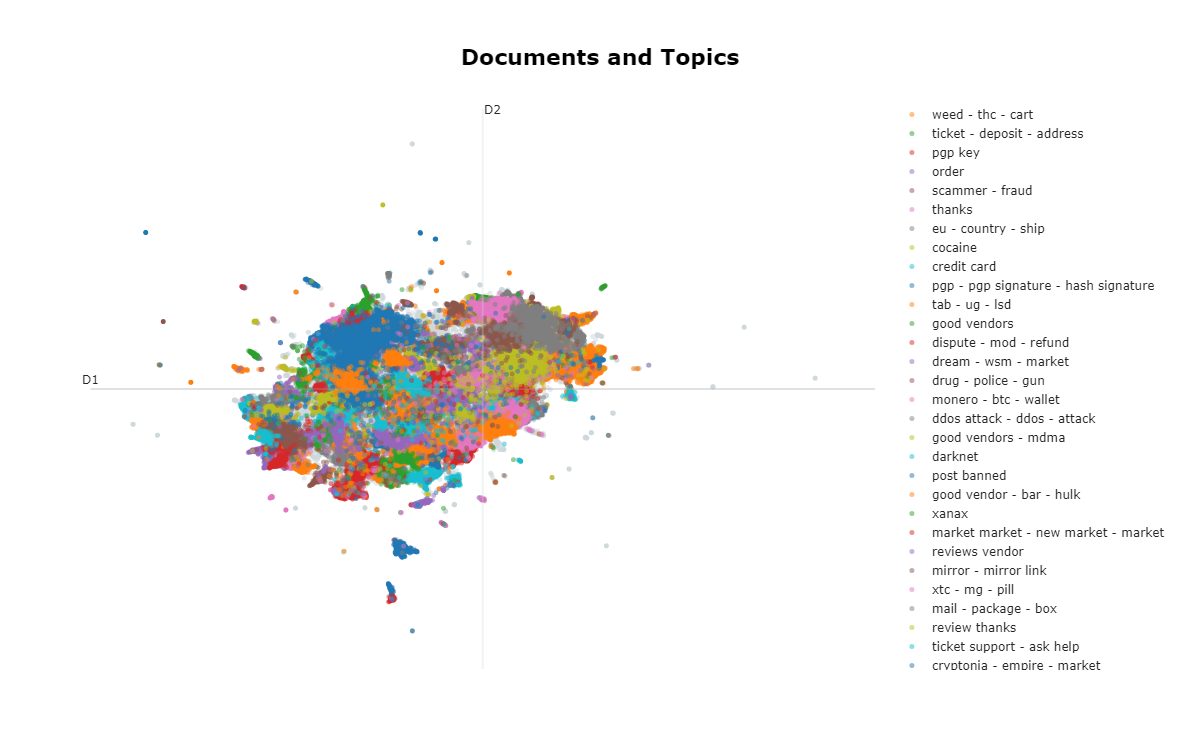

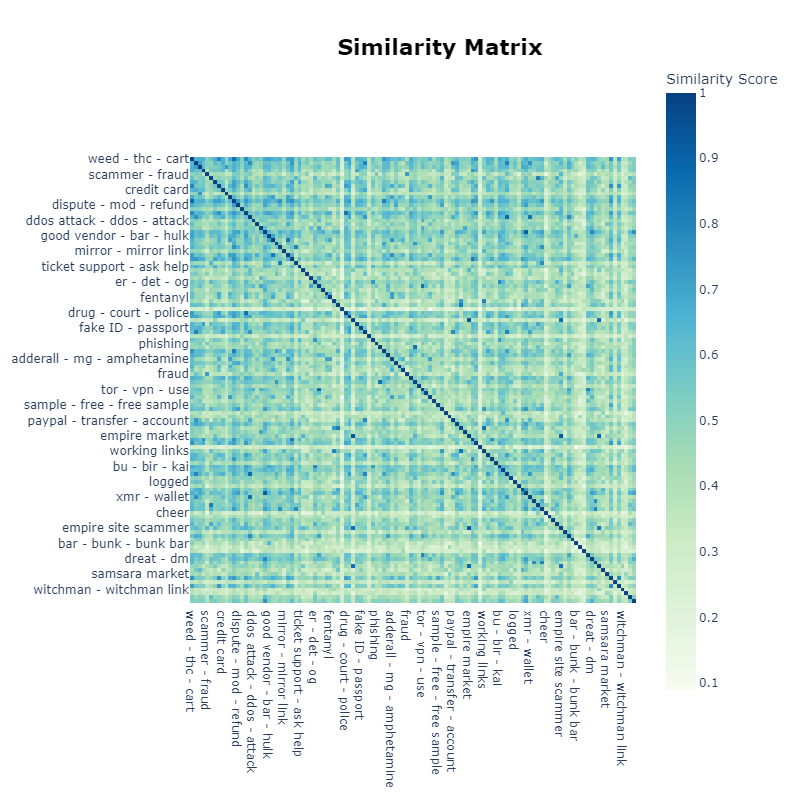

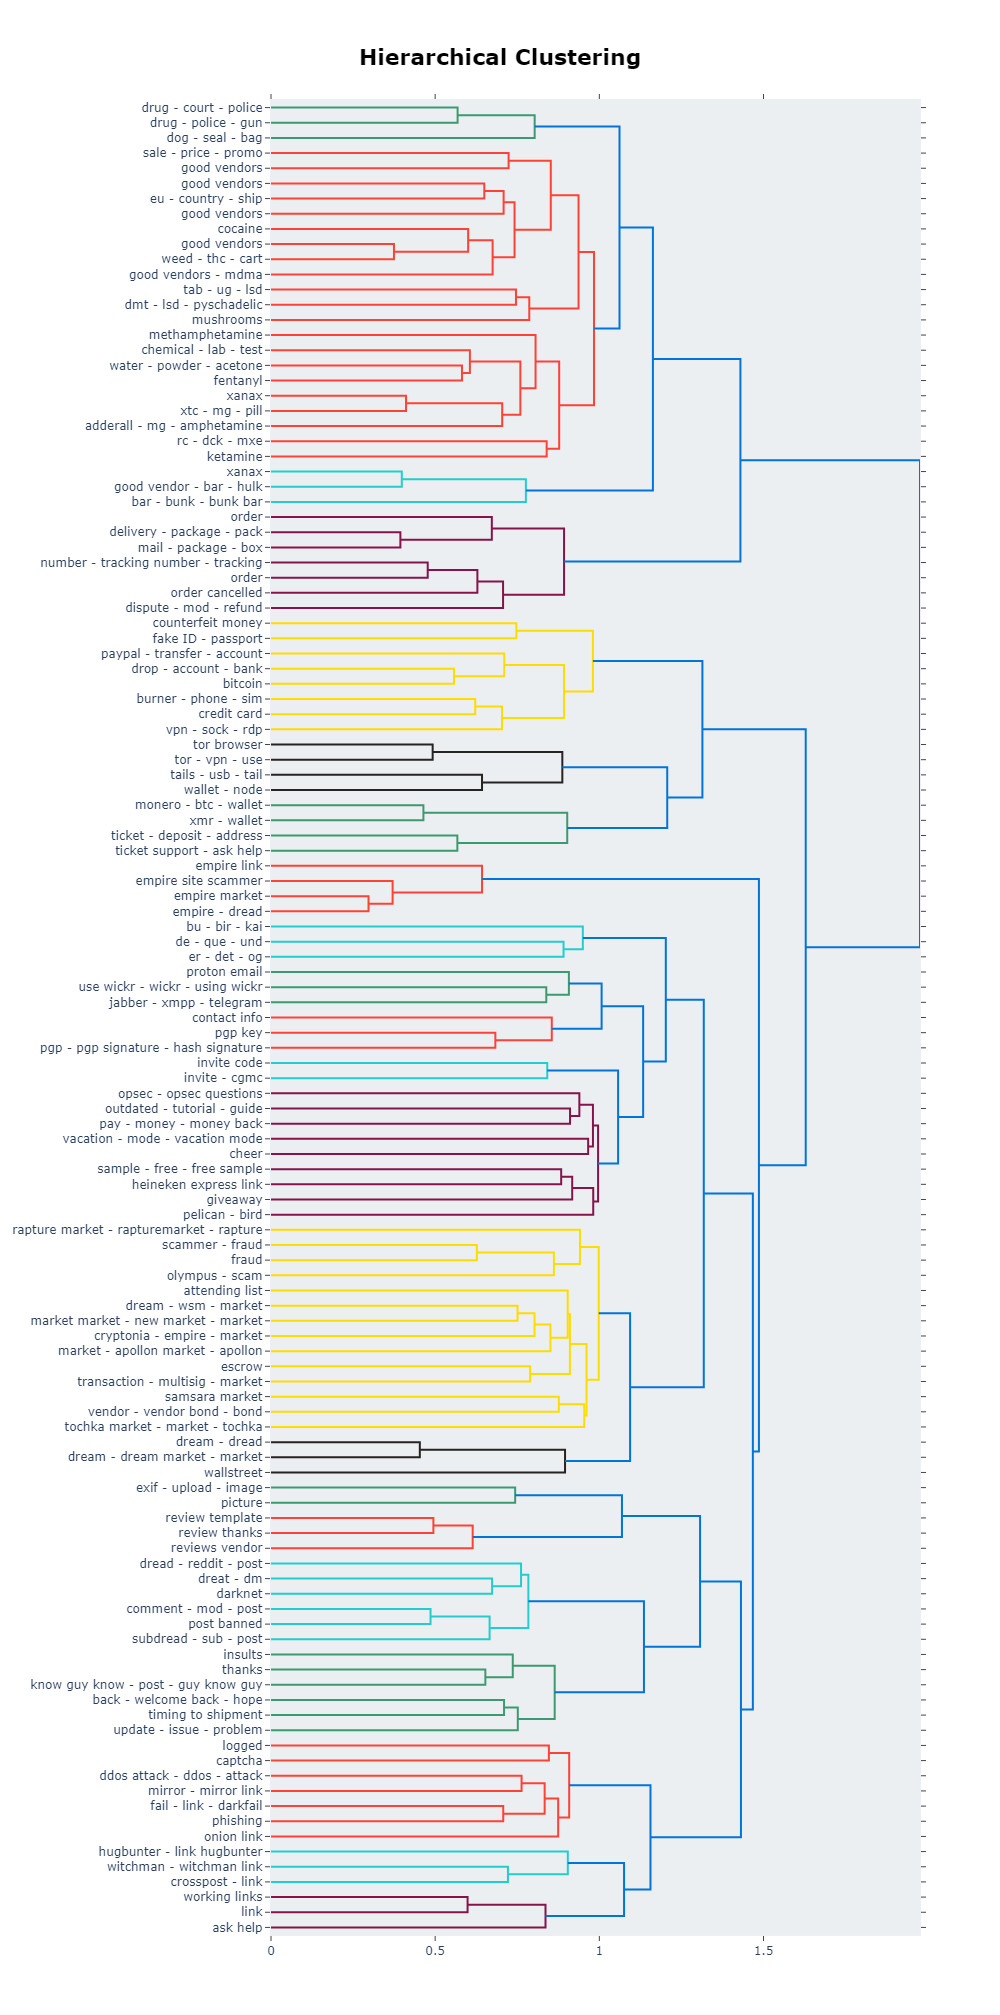

In [44]:
topic_model.visualize_barchart(top_n_topics=130, custom_labels=True, n_words=10, width=350, height=350)

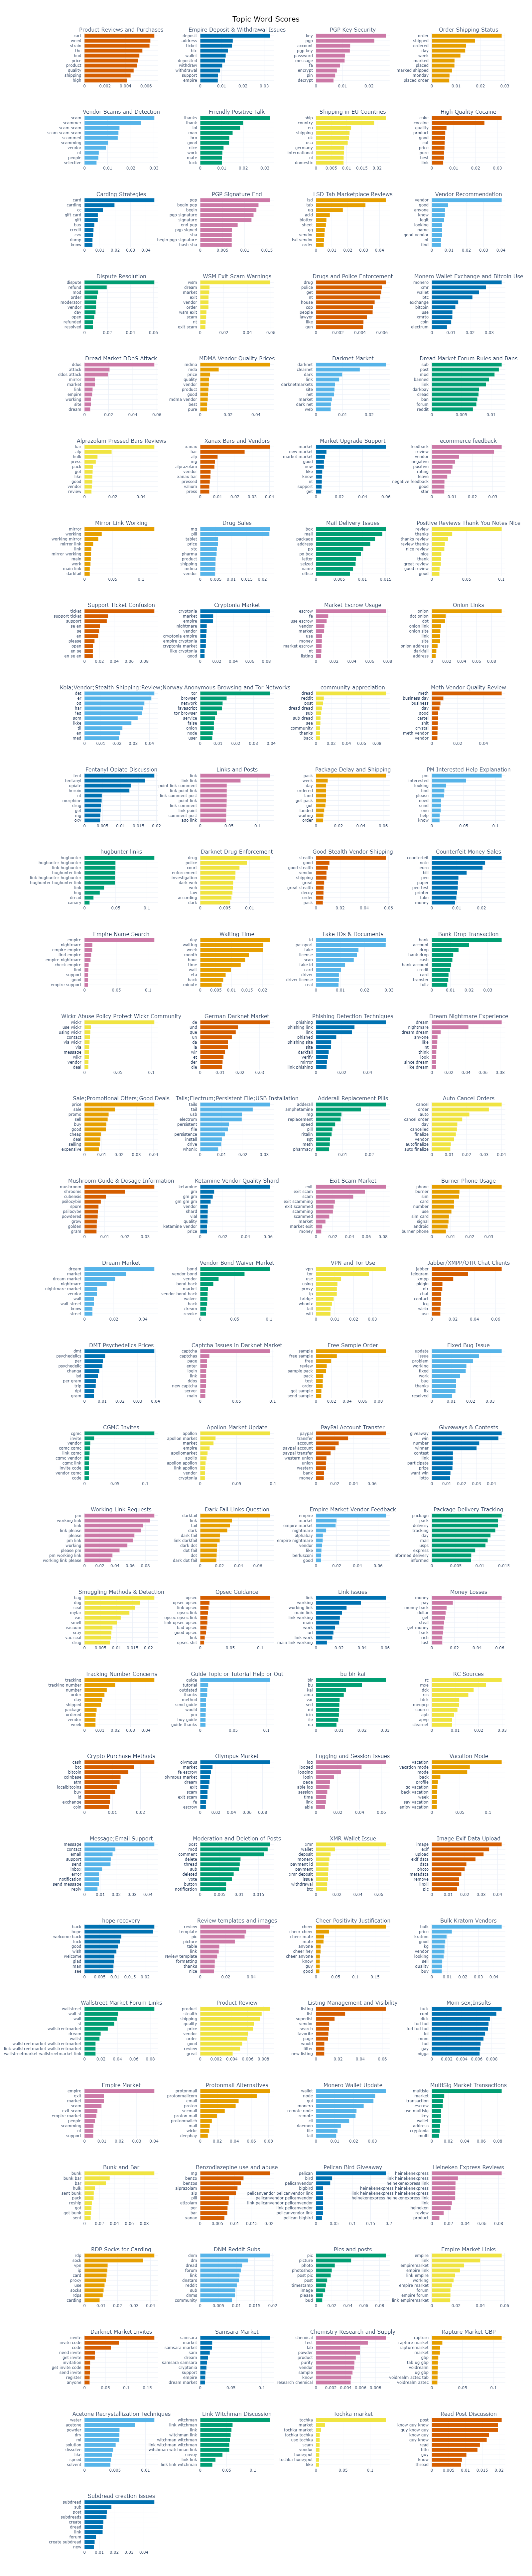

In [45]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10, width=1250, height=700, custom_labels=True)

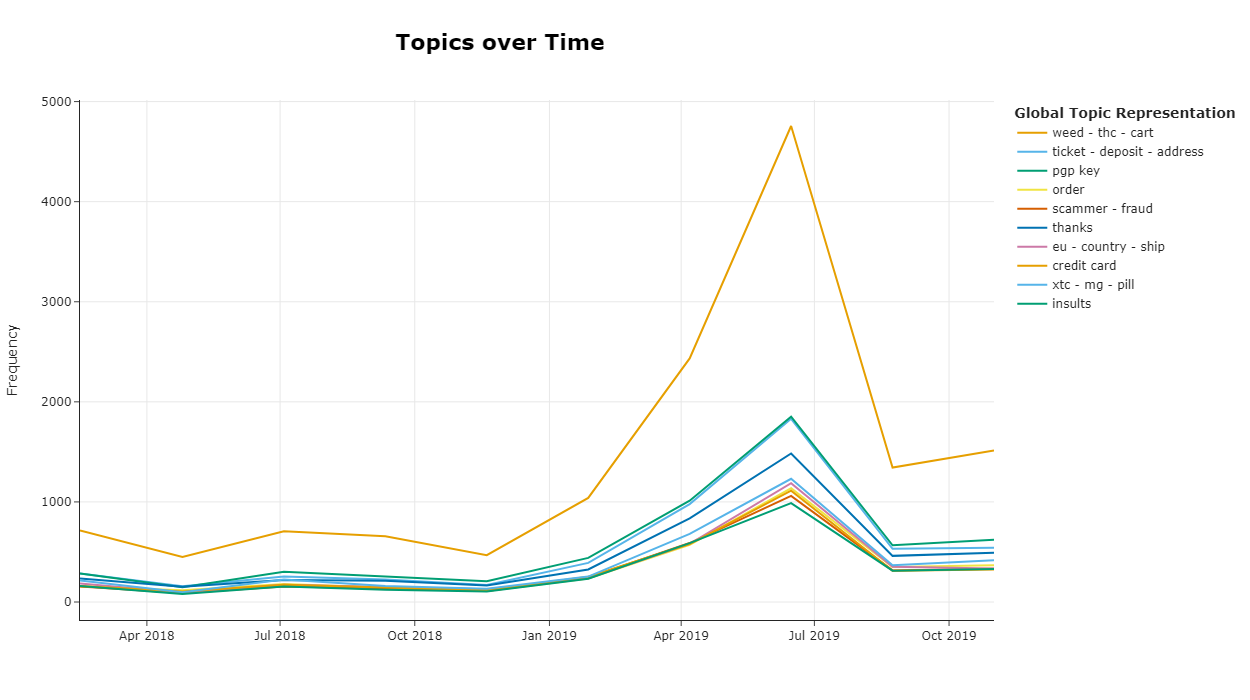
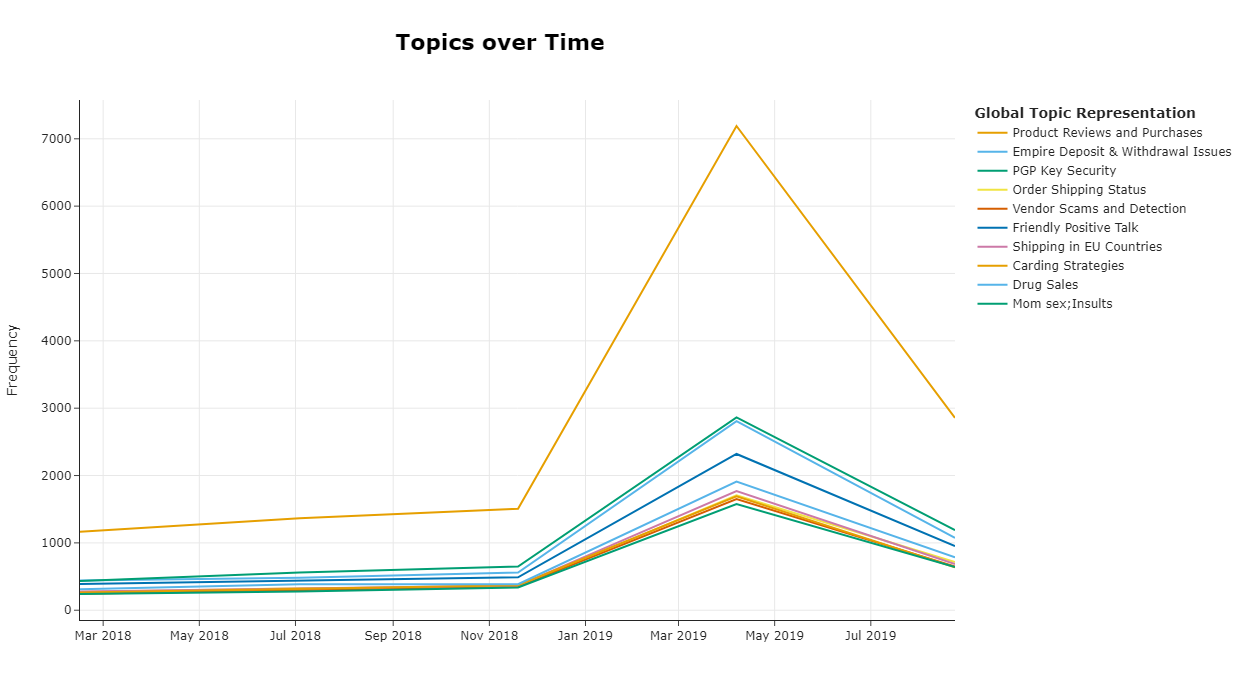
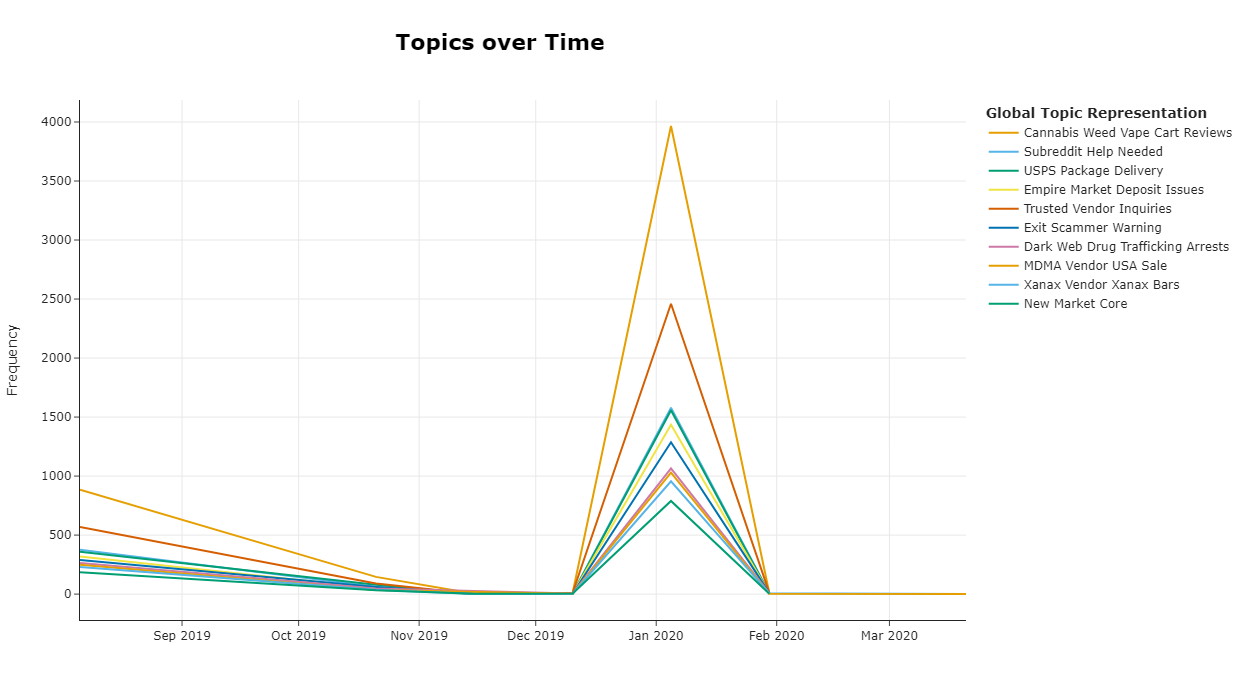

# Predict Models - Usage

In [21]:
topic_model = BERTopic.load("../../Analyze_files/CombiningAnalysisCompleteDataset/ContentAnalysis/ModelsContent/topic_model_all-MiniLM-L6-v2_190_20n_8dim", embedding_model='all-MiniLM-L6-v2')

In [49]:
sentence = ['recently closed Samsara market']
predict_topic(topic_model, sentence, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(samsara, 0.11383384349850058), (market, 0.01...",1.0,Samsara Market,"[samsara, market, samsara market, sam, dream, ...",recently closed Samsara market
1,"[(subdread, 0.047141772290036604), (sub, 0.018...",0.0,Subdread creation issues,"[subdread, sub, post, subdreads, create, dread...",recently closed Samsara market
2,"[(empire, 0.10987278200488068), (nightmare, 0....",0.0,Empire Name Search,"[empire, nightmare, empire empire, find empire...",recently closed Samsara market
3,"[(onion, 0.09360299836020991), (dot onion, 0.0...",0.0,Onion Links,"[onion, dot onion, dot, onion link, onion site...",recently closed Samsara market
4,"[(det, 0.04309335455807283), (er, 0.0412459466...",0.0,Kola;Vendor;Stealth Shipping;Review;Norway,"[det, er, og, har, jeg, som, ikke, til, en, med]",recently closed Samsara market


In [50]:
predict_topic(topic_model, ['i want to buy milk and coffee'], custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 17.74it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(water, 0.011463174046512533), (acetone, 0.00...",0.017596,Acetone Recrystallization Techniques,"[water, acetone, powder, dry, ml, solution, di...",i want to buy milk and coffee
1,"[(product, 0.008859635092686282), (stealth, 0....",0.015278,Product Review,"[product, stealth, shipping, quality, price, v...",i want to buy milk and coffee
2,"[(chemical, 0.00941712444197636), (test, 0.006...",0.015159,Chemistry Research and Supply,"[chemical, test, lab, powder, product, purity,...",i want to buy milk and coffee
3,"[(coke, 0.03196509150656362), (cocaine, 0.0241...",0.014840,High Quality Cocaine,"[coke, cocaine, quality, product, good, cut, p...",i want to buy milk and coffee
4,"[(cart, 0.006819976279333017), (weed, 0.006434...",0.014655,Product Reviews and Purchases,"[cart, weed, strain, thc, bud, price, product,...",i want to buy milk and coffee


In [51]:
predict_topic(topic_model, ['where i can found some keys account?'], custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(key, 0.02641300395674321), (pgp, 0.022053264...",1.000000e+00,PGP Key Security,"[key, pgp, account, pgp key, password, message...",where i can found some keys account?
1,"[(phishing, 0.054238417410435794), (phishing l...",1.109081e-12,Phishing Detection Techniques,"[phishing, phishing link, link, phished, phish...",where i can found some keys account?
2,"[(deposit, 0.032787925045137875), (address, 0....",4.357905e-13,Empire Deposit & Withdrawal Issues,"[deposit, address, ticket, btc, wallet, deposi...",where i can found some keys account?
3,"[(tails, 0.03283439657748927), (tail, 0.024664...",3.935350e-13,Tails;Electrum;Persistent File;USB Installation,"[tails, tail, usb, electrum, persistent, file,...",where i can found some keys account?
4,"[(wallet, 0.03722981938513912), (node, 0.03156...",3.831501e-13,Monero Wallet Update,"[wallet, node, gui, monero, remote node, remot...",where i can found some keys account?


In [52]:
predict_topic(topic_model, ['fuck you'], num_classes=3, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 40.53it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(thanks, 0.032484060113625514), (thank, 0.020...",9.610843e-01,Friendly Positive Talk,"[thanks, thank, lol, man, bro, good, nice, wor...",fuck you
1,"[(fuck, 0.009332787295000313), (cunt, 0.008628...",1.215710e-18,Mom sex;Insults,"[fuck, cunt, dick, fud fud, fud fud fud, lol, ...",fuck you
2,"[(back, 0.023056999364046565), (hope, 0.022570...",4.776323e-19,hope recovery,"[back, hope, welcome back, luck, good, wish, w...",fuck you


In [53]:
predict_topic(topic_model, ['how many bitcoins does it cost?'], num_classes=1, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 20.15it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(wallet, 0.03722981938513912), (node, 0.03156...",0.011528,Monero Wallet Update,"[wallet, node, gui, monero, remote node, remot...",how many bitcoins does it cost?


In [54]:
predict_topic(topic_model, ['hashish weed 2€'], num_classes=1, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 19.15it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(cart, 0.006819976279333017), (weed, 0.006434...",1.0,Product Reviews and Purchases,"[cart, weed, strain, thc, bud, price, product,...",hashish weed 2€


In [55]:
predict_topic(topic_model, ['i want to buy some guns'], num_classes=10, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 14.12it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(drug, 0.006367626524558121), (police, 0.0060...",0.015678,Drugs and Police Enforcement,"[drug, police, get, nt, house, cop, people, la...",i want to buy some guns
1,"[(counterfeit, 0.028169198429265012), (note, 0...",0.006188,Counterfeit Money Sales,"[counterfeit, note, euro, bill, pen, paper, pe...",i want to buy some guns
2,"[(dnm, 0.019318824601527097), (dm, 0.013234343...",0.005972,DNM Reddit Subs,"[dnm, dm, dread, forum, link, dnstars, reddit,...",i want to buy some guns
3,"[(box, 0.01507705645092756), (mail, 0.01430918...",0.005853,Mail Delivery Issues,"[box, mail, package, address, po, po box, lett...",i want to buy some guns
4,"[(price, 0.04048576410122761), (sale, 0.017703...",0.005852,Sale;Promotional Offers;Good Deals,"[price, sale, promo, sell, buy, good, cheap, d...",i want to buy some guns
5,"[(sub, 0.011803117925385692), (post, 0.0113216...",0.005752,Dread Market Forum Rules and Bans,"[sub, post, mod, banned, link, darkbay, dread,...",i want to buy some guns
6,"[(vendor, 0.040480309109643724), (good, 0.0095...",0.005739,Vendor Recommendation,"[vendor, good, anyone, know, legit, looking, n...",i want to buy some guns
7,"[(feedback, 0.03444248253886573), (review, 0.0...",0.005723,ecommerce feedback,"[feedback, review, vendor, negative, positive,...",i want to buy some guns
8,"[(scam, 0.030207670216535733), (scammer, 0.024...",0.005666,Vendor Scams and Detection,"[scam, scammer, scam scam, scam scam scam, sca...",i want to buy some guns
9,"[(product, 0.008859635092686282), (stealth, 0....",0.005576,Product Review,"[product, stealth, shipping, quality, price, v...",i want to buy some guns


In [56]:
predict_topic(topic_model, ['i like child'], num_classes=3, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 24.33it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(back, 0.023056999364046565), (hope, 0.022570...",9.383120e-01,hope recovery,"[back, hope, welcome back, luck, good, wish, w...",i like child
1,"[(pm, 0.10974551148060345), (interested, 0.053...",6.295266e-04,PM Interested Help Explanation,"[pm, interested, looking, find, please, need, ...",i like child
2,"[(fuck, 0.009332787295000313), (cunt, 0.008628...",8.768294e-17,Mom sex;Insults,"[fuck, cunt, dick, fud fud, fud fud fud, lol, ...",i like child


In [57]:
predict_topic(topic_model, ['fake id'], num_classes=3, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 25.46it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(id, 0.02876053122171935), (passport, 0.02866...",0.854973,Fake IDs & Documents,"[id, passport, fake, license, scan, fake id, c...",fake id
1,"[(counterfeit, 0.028169198429265012), (note, 0...",0.000007,Counterfeit Money Sales,"[counterfeit, note, euro, bill, pen, paper, pe...",fake id
2,"[(bank, 0.0375073137008834), (account, 0.01998...",0.000006,Bank Drop Transaction,"[bank, account, drop, bank drop, cash, bank ac...",fake id


In [58]:
predict_topic(topic_model, ['metilamine'], num_classes=3, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 17.79it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(meth, 0.054096945208171765), (business day, ...",0.191512,Meth Vendor Quality Review,"[meth, business day, business, day, good, cart...",metilamine
1,"[(adderall, 0.02619780315309616), (amphetamine...",0.010680,Adderall Replacement Pills,"[adderall, amphetamine, mg, replacement, speed...",metilamine
2,"[(water, 0.011463174046512533), (acetone, 0.00...",0.009602,Acetone Recrystallization Techniques,"[water, acetone, powder, dry, ml, solution, di...",metilamine


In [64]:
predict_topic(topic_model, ['send reqst'], num_classes=3, custom_labels=True)

Batches: 100%|██████████| 1/1 [00:00<00:00, 10.09it/s]


,Topic,Probability,Label,Words,Sentence
0,"[(message, 0.04414432197547059), (contact, 0.0...",0.899853,Message;Email Support,"[message, contact, email, support, send, inbox...",send reqst
1,"[(update, 0.03599327759279911), (issue, 0.0243...",0.000054,Fixed Bug Issue,"[update, issue, problem, working, fixed, work,...",send reqst
2,"[(pm, 0.10974551148060345), (interested, 0.053...",0.000054,PM Interested Help Explanation,"[pm, interested, looking, find, please, need, ...",send reqst
